In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os

root = os.getcwd()
root_prefixed = lambda p: os.path.join(root,p)

In [24]:
# read in all planets
df = pd.read_csv(root_prefixed('data/exoplots_data.csv'))

Print out the max radius and the corresponding planet name: 
77.342 HD 100546 b


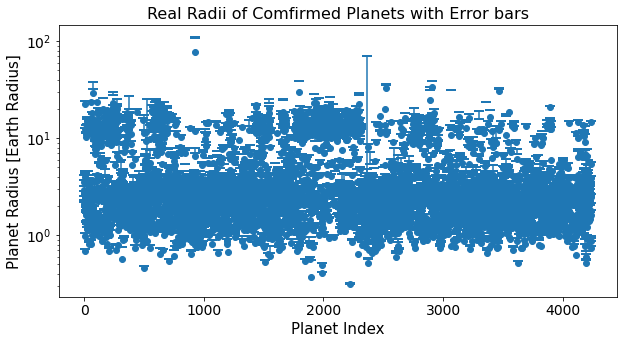

In [38]:
# make plots of comfirmed planets with real radii
# First check the error bar
df_real_radius = df.dropna(subset=['rade']).query("disposition == 'Confirmed'")
fig, ax = plt.subplots(1,1,figsize=(10, 5))
errors=np.array([df_real_radius['rade_err2'],df_real_radius['rade_err1']])
ax.errorbar(x=np.arange(len(df_real_radius)), y=df_real_radius['rade'], yerr=errors, fmt='o', capsize=5, capthick=2)
print( "Print out the max radius and the corresponding planet name: ")
print(df_real_radius['rade'].max(), df_real_radius['name'][df_real_radius['rade'].idxmax()])
ax.set_yscale('log')
ax.set_xlabel('Planet Index', fontsize=15)
ax.set_ylabel('Planet Radius [Earth Radius]', fontsize=15)
ax.set_title('Real Radii of Comfirmed Planets with Error bars', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

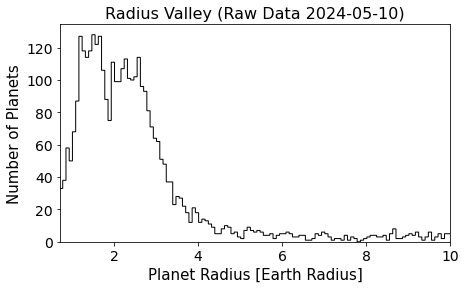

In [25]:
# plot radius valley
lowerbound = 0.7
upperbound = 10

fig, ax = plt.subplots(1,1,figsize=(7, 4))
ax.hist(df_real_radius['rade'], bins=1000, edgecolor='black',histtype='step')
ax.set_xlim(lowerbound, upperbound)
ax.set_xlabel('Planet Radius [Earth Radius]', fontsize=15)
ax.set_ylabel('Number of Planets', fontsize=15)
ax.set_title(f'Radius Valley (Raw Data {datetime.date.today()})', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

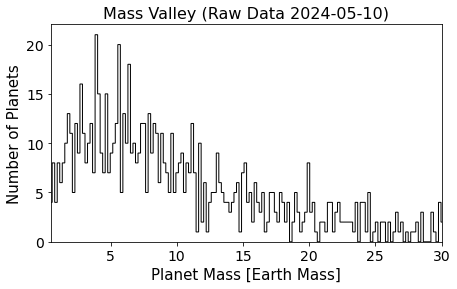

In [21]:
# plot mass PDF
df_real_mass = df.dropna(subset=['masse']).query("disposition == 'Confirmed'")
lowerbound = 0.5
upperbound = 30

fig, ax = plt.subplots(1,1,figsize=(7, 4))
ax.hist(df_real_mass['masse'], bins=50000, edgecolor='black',histtype='step')
ax.set_xlim(lowerbound, upperbound)
ax.set_xlabel('Planet Mass [Earth Mass]', fontsize=15)
ax.set_ylabel('Number of Planets', fontsize=15)
ax.set_title(f'Mass Valley (Raw Data {datetime.date.today()})', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()


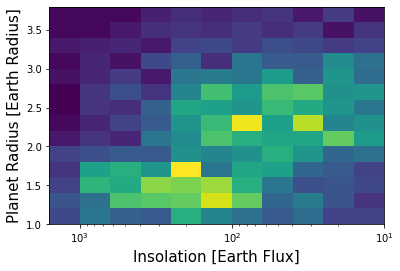

In [60]:
df_real_radius_real_inso = df.dropna(subset=['rade','insol']).query("disposition == 'Confirmed'")
plt.hist2d(df_real_radius_real_inso['insol'], df_real_radius_real_inso['rade'], bins=(10**np.arange(1,3.3,0.2),np.arange(1,4,0.2)), cmap='viridis')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Insolation [Earth Flux]', fontsize=15)
plt.ylabel('Planet Radius [Earth Radius]', fontsize=15)
plt.show()

(14, 14)


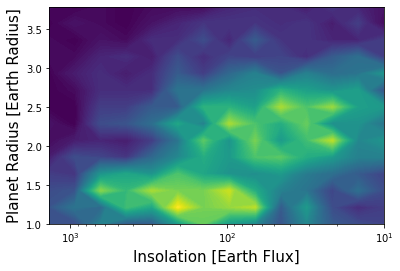

In [57]:
# compute planets in bins and plot contours
bins = [10**np.linspace(1,3.3,15),np.linspace(1,4,15)]
H, xedges, yedges = np.histogram2d(df_real_radius_real_inso['insol'], df_real_radius_real_inso['rade'], bins=bins)
H = H.T
print(H.shape)
X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
plt.contourf(X,Y,H, levels=100)
plt.xscale('log')
plt.xlabel('Insolation [Earth Flux]', fontsize=15)
plt.ylabel('Planet Radius [Earth Radius]', fontsize=15)
plt.gca().invert_xaxis()
plt.show()

In [15]:
# Plot the equilibrium temperature

R_sun = 6.96e8 # m
AU = 1.496e11 # m
T_planet = []; R_planet = []; M_planet = []; T_star = []
for i in range(len(df)):
    if df.loc[i, ['st_rad', 'st_mass', 'st_teff', 'period']].notna().all():
        if df.loc[i, ['rade', 'masse', 'semi_au']].notna().all():
            Tstar = df['st_teff'][i]
            Rstar = df['st_rad'][i]
            d = df['semi_au'][i]
            T_planet.append(Tstar * (Rstar*R_sun/(2*d*AU))**0.5)
            R_planet.append(df['rade'][i])
            M_planet.append(df['masse'][i])
            T_star.append(Tstar)
            # if T_planet[-1] > 2400 and R_planet[-1] < 2:
            #     print(f"{df['name'][i]}: {T_planet[-1]} K")
T_planet = np.array(T_planet); R_planet = np.array(R_planet); M_planet = np.array(M_planet)
            

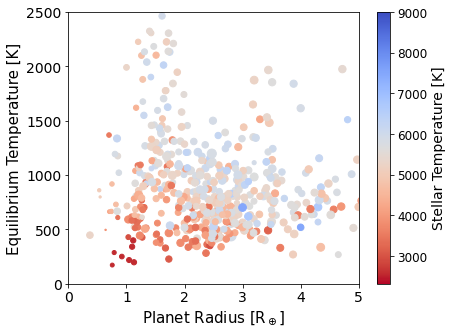

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6.5,5))
resized_M_planet = np.log10(M_planet) - np.min(np.log10(M_planet))+0.1
resized_T_star = np.minimum(T_star, 9000)
plot = ax.scatter(R_planet, T_planet, s=20*resized_M_planet, c=resized_T_star, cmap='coolwarm_r', alpha=1.0)
ax.set_ylim(0, 2500)
ax.set_xlim(0,5)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Planet Radius [R$_\oplus$]', fontsize=15)
ax.set_ylabel('Equilibrium Temperature [K]', fontsize=15)
cbar = fig.colorbar(plot, ax=ax)
cbar.set_label('Stellar Temperature [K]', fontsize=14)
cbar.ax.tick_params(labelsize=12)
plt.show()